In [13]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError,categorical_crossentropy,sparse_categorical_crossentropy,binary_crossentropy
from tensorflow.keras.metrics import MeanAbsoluteError, MeanSquaredError, Accuracy
from tensorflow.keras.utils import load_img, img_to_array
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE


In [14]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\mrtat\Downloads\xray_dataset_covid19\train",
    image_size=(64, 64),
    batch_size=32,
    label_mode='categorical'  # or 'int', 'binary'
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\mrtat\Downloads\xray_dataset_covid19\test",
    image_size=(64, 64),
    batch_size=32,
    label_mode='categorical'  # or 'int', 'binary'
)

Found 148 files belonging to 2 classes.


Found 40 files belonging to 2 classes.


In [15]:
def build_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu',input_shape=(64, 64, 3)),  # Adjust input shape for Conv2D
        MaxPooling2D((2, 2)),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        BatchNormalization(),
        Flatten(),
        
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dropout(0.2),  # Dropout layer to prevent overfitting


        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dropout(0.2),  # Dropout layer to prevent overfitting


        Dense(32, activation='relu'),
        Dense(32, activation='relu'),
        Dropout(0.2),  # Dropout layer to prevent overfitting

        
        Dense(16, activation='relu'),
        Dense(16, activation='relu'),




        Dense(2, activation='sigmoid'),  # Output layer for class classification
        
    ])

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',  # Use categorical crossentropy for class classification
                  metrics=['accuracy'])
    return model


In [16]:
model=build_model()
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 31, 31, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,658,434 (6.33 MB)

 Trainable params: 1,658,242 (6.33 MB)

 Non-trainable params: 192 (768.00 B)

In [17]:
print("\nTraining the model...")
history=model.fit(
    train_ds,
    epochs=50,
    batch_size=32,
    validation_data=test_ds,
    callbacks=[EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)]
)


Training the model...
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 263ms/step - accuracy: 0.6367 - loss: 0.6220 - val_accuracy: 0.5000 - val_loss: 7.7875
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 168ms/step - accuracy: 0.9142 - loss: 0.3098 - val_accuracy: 0.5000 - val_loss: 4.8726
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 223ms/step - accuracy: 0.9166 - loss: 0.2107 - val_accuracy: 0.5000 - val_loss: 11.0269
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 185ms/step - accuracy: 0.9815 - loss: 0.0657 - val_accuracy: 0.7250 - val_loss: 1.6266
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step - accuracy: 0.9685 - loss: 0.0717 - val_accuracy: 0.9750 - val_loss: 0.0796
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 174ms/step - accuracy: 0.9921 - loss: 0.0231 - val_accuracy: 1.0000 - val_loss: 0.0151
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 174ms/step - accuracy: 0.9964 - loss: 0.0228 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 198ms/step - accuracy: 1.0000 - loss: 0.0060 - val_acc

Text(0.5, 1.0, 'Model Loss')

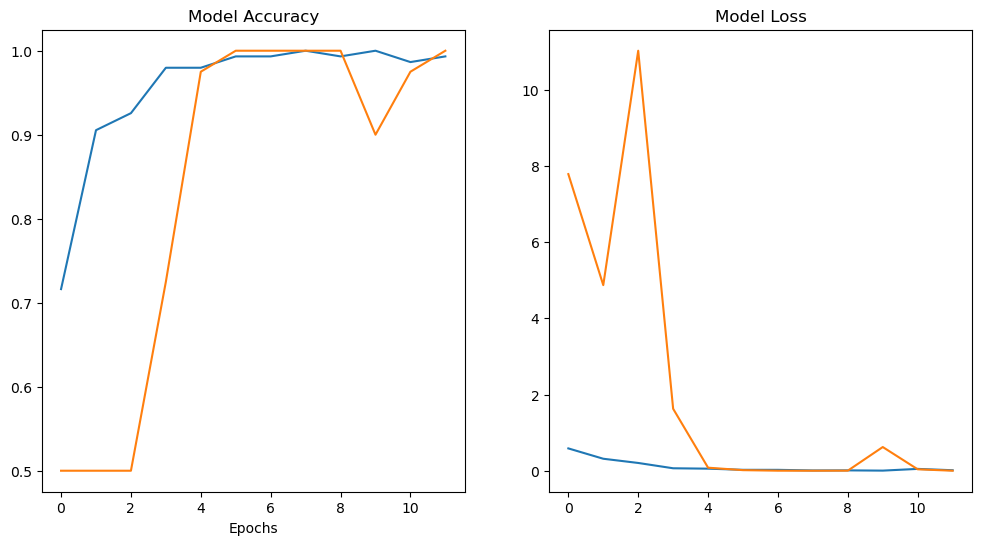

In [18]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')